# Batch Normalization on CIFAR-10

In this notebook we implement batch normalization, which is an opimization method useful for deep feed-forward neural networks, such as deep CNNs. Here we implement it on a toy-model of fully-connected (dense) layers, and toy-data (CIFAR-10).

In addition to Batch Normalization, we demonstrate how to implement early stopping, saving a checkpoint model, and use Keras logging for Tensorboard. 

The main takeaways from this notebook are to know how to implement in Keras:
1. Batch Normalization
2. Early Stopping
3. Saving Checkpoints
4. Default Keras Logs into Tensorboard

Based on the [notebook](https://github.com/ageron/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb) of Geron, chapter 11, exercise 8.
Presented here in accordance with the Apache 2.0 license. 

In [1]:
import tensorflow as tf

## Get the Data
CIFAR-10 dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes (for students: what is the difference between CIFAR-10 and MNIST in that sense?).

We get the data from tf.keras.datasets (similar to how we did for MNIST). This means that we get numpy array back. 

As seen in the [dataset description](https://keras.io/api/datasets/cifar10/), the 10 classes are:

Label |	Description
--- | ---
0 |	airplane
1 |	automobile
2 |	bird
3 |	cat
4 |	deer
5 |	dog
6 |	frog
7 |	horse
8 |	ship
9 |	truck

In [3]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

# TODO: for the students: how many images are there in the training and the validation sets?
# TODO: for the students: what does 'x' and 'y' stand for?
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 15s 0us/step


## Data Exploration

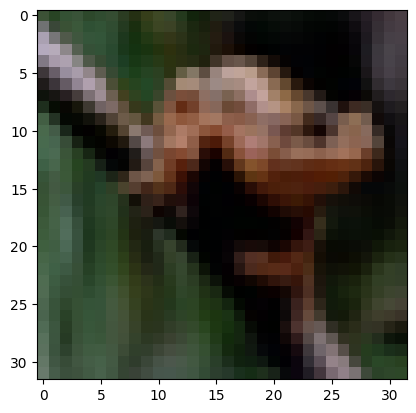

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
print(y_train[0])

[6]


In [10]:
# TODO: for the students: which additional data explorations would you do?

## Define the Base Model
Here we build a DNN with 20 hidden layers of 100 neurons each. 
That's too many, but it's the point of this exercise, because it allows us to use some of the optimization techniques we learned.

In [2]:
# TODO: for the students: can you add comments to each line of code below explaining what it does and why?

# ?
tf.random.set_seed(42)

# ?
model = tf.keras.Sequential()
# ?
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
# ?
for _ in range(20):
    # ?
    model.add(tf.keras.layers.Dense(100,
                                    # ?
                                    activation="swish",
                                    # ? 
                                    kernel_initializer="he_normal"))
# ?
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## Define the Loss Function, Optimizer and Metrics

In [11]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

## Define Callbacks for Early Stopping, Checkpoints, and Logging

In [13]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = f"./runs/cifar10_logs/run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

## Traing the Model
Before start running the training, initialize Tensorboard, such that you can view the training as it progresses.

In [14]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1405/1407 [============================>.] - ETA: 0s - loss: 8.2860 - accuracy: 0.1004

INFO:tensorflow:Assets written to: cifar10_model\assets


INFO:tensorflow:Assets written to: cifar10_model\assets


1407/1407 [==============================] - 17s 8ms/step - loss: 8.2863 - accuracy: 0.1003 - val_loss: 8.1452 - val_accuracy: 0.0972
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 8.2026 - accuracy: 0.1003 - val_loss: 9.7473 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 9.7007 - accuracy: 0.1003 - val_loss: 9.7473 - val_accuracy: 0.0972
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 9.7007 - accuracy: 0.1003 - val_loss: 9.7473 - val_accuracy: 0.0970
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 9.7007 - accuracy: 0.1003 - val_loss: 9.7472 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 9.7003 - accuracy: 0.1003 - val_loss: 9.7472 - val_accuracy: 0.0972
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 9.7003 - accuracy: 0.1003 - val_loss: 9.7472 - val_accuracy: 0.0

### Batch Normalization

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_bn_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = f"cifar10_logs/run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 2.0596 - accuracy: 0.2446

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 30s 13ms/step - loss: 2.0592 - accuracy: 0.2447 - val_loss: 1.8729 - val_accuracy: 0.3244
Epoch 2/100
1407/1407 [==============================] - ETA: 0s - loss: 1.7832 - accuracy: 0.3565

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.7832 - accuracy: 0.3565 - val_loss: 1.8135 - val_accuracy: 0.3414
Epoch 3/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6860 - accuracy: 0.3997

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6860 - accuracy: 0.3997 - val_loss: 1.6883 - val_accuracy: 0.3830
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6171 - accuracy: 0.4231 - val_loss: 1.7486 - val_accuracy: 0.3808
Epoch 5/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.5609 - accuracy: 0.4447

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.5610 - accuracy: 0.4447 - val_loss: 1.5807 - val_accuracy: 0.4320
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5140 - accuracy: 0.4638 - val_loss: 1.7323 - val_accuracy: 0.3884
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4638 - accuracy: 0.4790 - val_loss: 1.6086 - val_accuracy: 0.4216
Epoch 8/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4252 - accuracy: 0.4965 - val_loss: 1.7078 - val_accuracy: 0.3994
Epoch 9/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.3954 - accuracy: 0.5075

INFO:tensorflow:Assets written to: cifar10_bn_model\assets


INFO:tensorflow:Assets written to: cifar10_bn_model\assets


1407/1407 [==============================] - 26s 18ms/step - loss: 1.3952 - accuracy: 0.5076 - val_loss: 1.4378 - val_accuracy: 0.4818
Epoch 10/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3603 - accuracy: 0.5170 - val_loss: 1.4825 - val_accuracy: 0.4752
Epoch 11/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3320 - accuracy: 0.5276 - val_loss: 1.5133 - val_accuracy: 0.4770
Epoch 12/100
1407/1407 [==============================] - 18s 12ms/step - loss: 1.3041 - accuracy: 0.5368 - val_loss: 1.6617 - val_accuracy: 0.4166
Epoch 13/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2786 - accuracy: 0.5451 - val_loss: 1.5835 - val_accuracy: 0.4548
Epoch 14/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.2536 - accuracy: 0.5569 - val_loss: 1.5254 - val_accuracy: 0.4780
Epoch 15/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.2278 - accuracy: 0.5642 - val_loss: 1.5365 

[1.4378284215927124, 0.48179998993873596]